<a href="https://colab.research.google.com/github/ashan210/Betel-app-machine-learning-model/blob/main/ash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with Keras and Tensorflow

In [1]:
!git clone https://github.com/ashan210/Betel-app-machine-learning-model.git

Cloning into 'Betel-app-machine-learning-model'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


## Getting Prepared

Download and extract the dataset

In [ ]:
import os
from PIL import Image
import numpy as np
import cv2
import pickle
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path to the directory containing your dataset in Google Drive
dataset_dir = '/content/drive/My Drive/model01.tar/model/'

# List files in the dataset directory
files = os.listdir('/content/drive/My Drive/model01.tar/model/')

# Print the list of files
print("Files in the dataset directory:")
for file in files:
    print(file)

Files in the dataset directory:
train_set
.git
val_set
model.pkl


Verify that the data is there

In [ ]:
from PIL import Image
from IPython.display import display

In [ ]:
im = Image.open('/content/drive/My Drive/model01.tar/model/train_set/oil/IMG_20210516_124633.png')

In [ ]:
!pip install tensorboardcolab

  Preparing metadata (setup.py) ... done
  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3832 sha256=ddf420999769753c1409647c46f143517d27969f4e6f504cf5c51c7bbd0d561f
  Stored in directory: /root/.cache/pip/wheels/8d/ee/46/7fe2bbbf1edbcfeabfaf13962dcaadec1f631d11147fd9d34d
Successfully built tensorboardcolab


In [ ]:
#display(im)

In [ ]:
import numpy as np
image_arr = np.array(im)
image_arr.shape
image_arr

array([[[206, 207, 209, 255],
        [205, 206, 208, 255],
        [202, 203, 205, 255],
        ...,
        [208, 209, 213, 255],
        [209, 210, 214, 255],
        [208, 209, 213, 255]],

       [[201, 202, 204, 255],
        [201, 202, 204, 255],
        [199, 200, 202, 255],
        ...,
        [208, 209, 212, 255],
        [208, 209, 212, 255],
        [206, 207, 210, 255]],

       [[200, 201, 203, 255],
        [200, 201, 203, 255],
        [200, 201, 203, 255],
        ...,
        [208, 209, 212, 255],
        [210, 211, 214, 255],
        [210, 211, 213, 255]],

       ...,

       [[210, 213, 215, 255],
        [214, 217, 219, 255],
        [217, 220, 222, 255],
        ...,
        [ 91,  95,  96, 255],
        [ 94,  98,  99, 255],
        [ 98, 102, 103, 255]],

       [[216, 218, 220, 255],
        [219, 221, 224, 255],
        [220, 222, 225, 255],
        ...,
        [ 91,  95,  96, 255],
        [ 94,  98,  99, 255],
        [ 96, 100, 101, 255]],

       [[222

## Module import and variable initialization


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# dimensions of our images.
img_width, img_height = 128, 128

In [ ]:
train_data_dir = '/content/drive/My Drive/model01.tar/model/train_set'
validation_data_dir = '/content/drive/My Drive/model01.tar/model/val_set'
nb_train_samples = 168
nb_validation_samples = 37
epochs = 50
batch_size = 32

## Define the CNN model

In [ ]:
#New Tensorflow model
input_shape = (img_width, img_height, 3)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))


d2 = tf.keras.layers.Dense(64,activation='relu')
model.add(d2)

model.add(tf.keras.layers.Dropout(0.5))
d3 =  tf.keras.layers.Dense(3,activation='softmax')
model.add(d3)




In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)



In [ ]:
weights = d3.get_weights()
weights[1].shape

(3,)

## Prepare data feeders

In [ ]:
# this is the data augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 168 images belonging to 3 classes.
Found 37 images belonging to 3 classes.


## Test the data feeders

In [ ]:
datum = next(train_generator)
image_batch, label_batch = datum
image_batch.shape
k = 3
image = image_batch[k, ...]
label = label_batch[k, ...]

label

array([0., 0., 1.], dtype=float32)

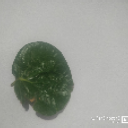

In [ ]:
display(Image.fromarray((image * 255).astype(np.uint8)))

In [ ]:
image_batch.shape

(32, 128, 128, 3)

In [ ]:


import datetime
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



## Fit the model

In [ ]:
# tbc = TensorBoardColab()
#model.fit(
   # train_generator,
    #steps_per_epoch=nb_train_samples // batch_size,
    #epochs=epochs,
    #validation_data=validation_generator,
    #validation_steps=nb_validation_samples // batch_size,
    #callbacks = [tensorboard_callback]
#)

In [ ]:
# Save the trained model using pickle
model_path = '/content/drive/My Drive/model01.tar/model/model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Load the saved model using pickle
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
#%tensorboard --logdir logs/fit



## Save the weights

In [ ]:
model.save_weights('saved_weights.h5')

In [ ]:
# model.load_weights('source_file.h5')

## Make predictions with the trained CNN!

In [ ]:
# Load the image
im = Image.open('/content/drive/My Drive/model01.tar/model/val_set/healthy/PB-S-006.png')


In [ ]:
# Convert the image to RGB if it has an alpha channel
im = im.convert('RGB')

In [ ]:
# Resize the image to 128x128
resized_im = im.resize((128, 128))

In [ ]:
# Convert image to numpy array and normalize
img = np.array(resized_im) / 255.

In [ ]:
# Check the shape of the image
print("Original image shape:", img.shape)


Original image shape: (128, 128, 3)


In [ ]:
# Add a batch dimension
img = img[np.newaxis, ...]

In [ ]:
# Check the shape after adding batch dimension
print("Image shape with batch dimension:", img.shape)


Image shape with batch dimension: (1, 128, 128, 3)


In [ ]:
# Now you can pass this img to your model for prediction
out = model.predict_on_batch(img)


In [ ]:
out

array([[0.32261628, 0.30588886, 0.37149486]], dtype=float32)

In [ ]:
np.sum(out)

1.0

In [ ]:
np.argmax(out)

2

In [ ]:
# Print the sum of predictions
print("Sum of predictions:", np.sum(out))

Sum of predictions: 1.0


In [ ]:
# Get the index of the highest prediction
print("Index of the highest prediction:", np.argmax(out))

Index of the highest prediction: 2


In [ ]:
# Map output values to corresponding labels
label_mapping = {
    0: 'healthy',
    1: 'oil',
    2: 'other'
}

In [ ]:
# Get the index of the highest prediction
prediction_index = np.argmax(out)

In [ ]:
# Get the corresponding label
prediction_label = label_mapping.get(prediction_index, 'unknown')

In [ ]:
# Print the prediction label
print("Prediction:", prediction_label)

Prediction: other


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)